<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<b><center><font size="6">Travaux Dirigés - Econométrie en finance - séance 6 - corrigé</font></center></b>
    

    
<g><h7><center> CM - P. Durand  - pierre.durand@u-pec.fr </center></h7></g>

<g><h7><center> TD - R. Birem  - abderraouf.birem@u-pec.fr </center></h7></g>


<b><center><font size="5">M1 - 2024-2025</font></center></b> 



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: 2.5px solid black;">


<b>Objectifs de la séance : </b>

- Application économétrique
- Econométrie des séries temporelles
- Stationnarité



</span>

<hr style=" border: .5px solid black;">
<br>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


Nous reprenons les données portant sur le CAPM sur lesquelles nous avons déjà travaillé. Le modèle auquel que nous avions étudié est le suivant :

<br>


$$E(R_i) - r =  \alpha + \beta_1 \times (E(R_m) - r) + \epsilon$$
    
<br>
    
Nous avions ajouté un certain nombre de variable explicatives (effet du prix du pétrole) : 
    
$$E(R_i) - r =  \alpha + \beta_1 \times (E(R_m) - r) + \beta_2 \times (E(R_{oil} - r) + \epsilon$$
    
et des dummy (effet des crises) :
    
$$E(R_i) - r =  \alpha + \beta_1 \times (E(R_m) - r) + \beta_2 \times R_{oil} + \beta_3 D_{crise} + \beta_4 D_{covid} + \epsilon$$

<br>
    
où $E(R_i)$ renvoie à la rentabilité espérée pour l'actif $i$, $E(R_m)$ est la rentabilité espérée du marché, r désigne le taux d'intérêt sans risque (généralement approximé par le taux d'intérêt directeur), $E(R_{oil}$ renvoie aux rendements des prix du pétrole, $D_{crise}$ est une dummy valant $1$ au moment de la crise et $0$ sinon, D_{covid} est une dummy pour la crise sanitaire, $\alpha$ et $\beta$ sont les coefficients à estimer et $\epsilon$ désigne le terme d'erreur. 
    
    
    
<br>
    
Nous n'avions pas vu, à ce moment là, les problématiques tournant autour de la stationnarité. Nous allons donc mener cette analyse qui doit être ménée dés lors que l'on travaille sur des séries temporelles (sauf dummy bien en tendu !).    



<br>

<hr style=" border: .5px solid black;">

1. Importez la base de données "capm2.txt".


_Note_ :
- attention de bien connaître l'emplacement où vous mettez la base sur votre ordinateur
- remplacer les "\" par des "/" dans le chemin d'accès
- ajouter un "/" à la fin du chemin
- utiliser le package `pandas` (sous le nom `pd`)
- le fichier est au format texte `.txt` (équivalent de csv) : utilisez la fonction `.read_csv()` en spécifiant le séparateur (`sep = ";"`)

</span> 

In [2]:
import pandas as pd

In [3]:
chemin = "C:\\Users\\issak\\Documents\\M1\\Econométrie en Banque-Finance\\data_2\\"

df = pd.read_csv(chemin + "capm2.txt", sep=";")

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<hr style=" border: .5px solid black;">

2. Vérifiez que la base de données à bien été importée en affichant l'entête du dataframe



</span> 

In [4]:
df.head()

,date,ford,sandp,ustb3m,oil
0,2001-01-01,15.454666,1366.010010,4.84,28.700001
1,2001-02-01,15.411097,1239.939941,4.72,27.420000
2,2001-03-01,15.582887,1160.329956,4.18,26.400000
3,2001-04-01,16.336536,1249.459961,3.83,26.400000
4,2001-05-01,13.631827,1255.819946,3.54,28.370001


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


La base de données contient 5 variables à fréquence mensuelle, de janvier 2001 à mai 2021 (245 observations) :
- `date` qui contient les dates
- `ford` qui contient l'indice des prix de l'actif de l'entreprise Ford
- `sandp` qui contient l'indice des prix du marché (indice S&P 500)
- `ustb3m` qui contient l'indice des bons du trésor américain à 3 mois (proxy pour le taux d'intérêt sans risque)
- `oil` contient l'indice des prix du pétrole 

<hr style=" border: .5px solid black;">

3. Calculer les différentes variables suivantes :
    - $rsandp_t = 100 \times (sandp_t / sandp_{t-1} - 1)$
    - $rford_t = 100 \times (ford_t / ford_{t-1} - 1)$
    - $roil = 100 \times (oil_t / oil_{t-1} - 1)$
    - $ersandp = rsandp - ustb3m$
    - $erford = rford - ustb3m$



Affichez l'entête du dataframe pour vérifier que les variables ont bien été créées. 

<br>

_Note_ : 
- pour rappel, créer une nouvelle variable dans un dataframe à partir d'une variable déjà contenue par ce dataframe se fait comme suit (par exemple la différence entre deux var `X_1` et `X_2`),

`df[ " nom_de_la_nouvelle_var " ] = df[ " X_1 " ] - df[ " X_2 " ]`

- pour avoir une variable décalée d'une période (en `t-1`, on utilise la fonction `.shft(-1)`) :

`df[ "X" ].shift(1)`


</span> 

In [5]:
df["rsandp"] = 100 * ( df["sandp"]/df["sandp"].shift(1) - 1 )
df["rford"] = 100 * ( df["ford"]/df["ford"].shift(1) - 1 )
df["roil"] = 100 * ( df["oil"]/df["oil"].shift(1) - 1 )
df["ersandp"] = df["rsandp"] - df["ustb3m"]
df["erford"] = df["rford"] - df["ustb3m"]

In [6]:
df.head()

,date,ford,sandp,ustb3m,oil,rsandp,rford,roil,ersandp,erford
0,2001-01-01,15.454666,1366.010010,4.84,28.700001,NaN,NaN,NaN,NaN,NaN
1,2001-02-01,15.411097,1239.939941,4.72,27.420000,-9.229074,-0.281915,-4.459934,-13.949074,-5.001915
2,2001-03-01,15.582887,1160.329956,4.18,26.400000,-6.420471,1.114716,-3.719912,-10.600471,-3.065284
3,2001-04-01,16.336536,1249.459961,3.83,26.400000,7.681436,4.836389,0.000000,3.851436,1.006389
4,2001-05-01,13.631827,1255.819946,3.54,28.370001,0.509019,-16.556196,7.462125,-3.030981,-20.096196


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


    
    
    
<hr style=" border: .5px solid black;">

4. Commentez les graphiques suivants : 
- Qu'est ce qui est affichez ? 
- Quel intérêt ? 
- Comment l'interpréter ?
    
    
<br>
    

    
    
<br>
    
    
    


</span> 

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import matplotlib.pyplot as plt

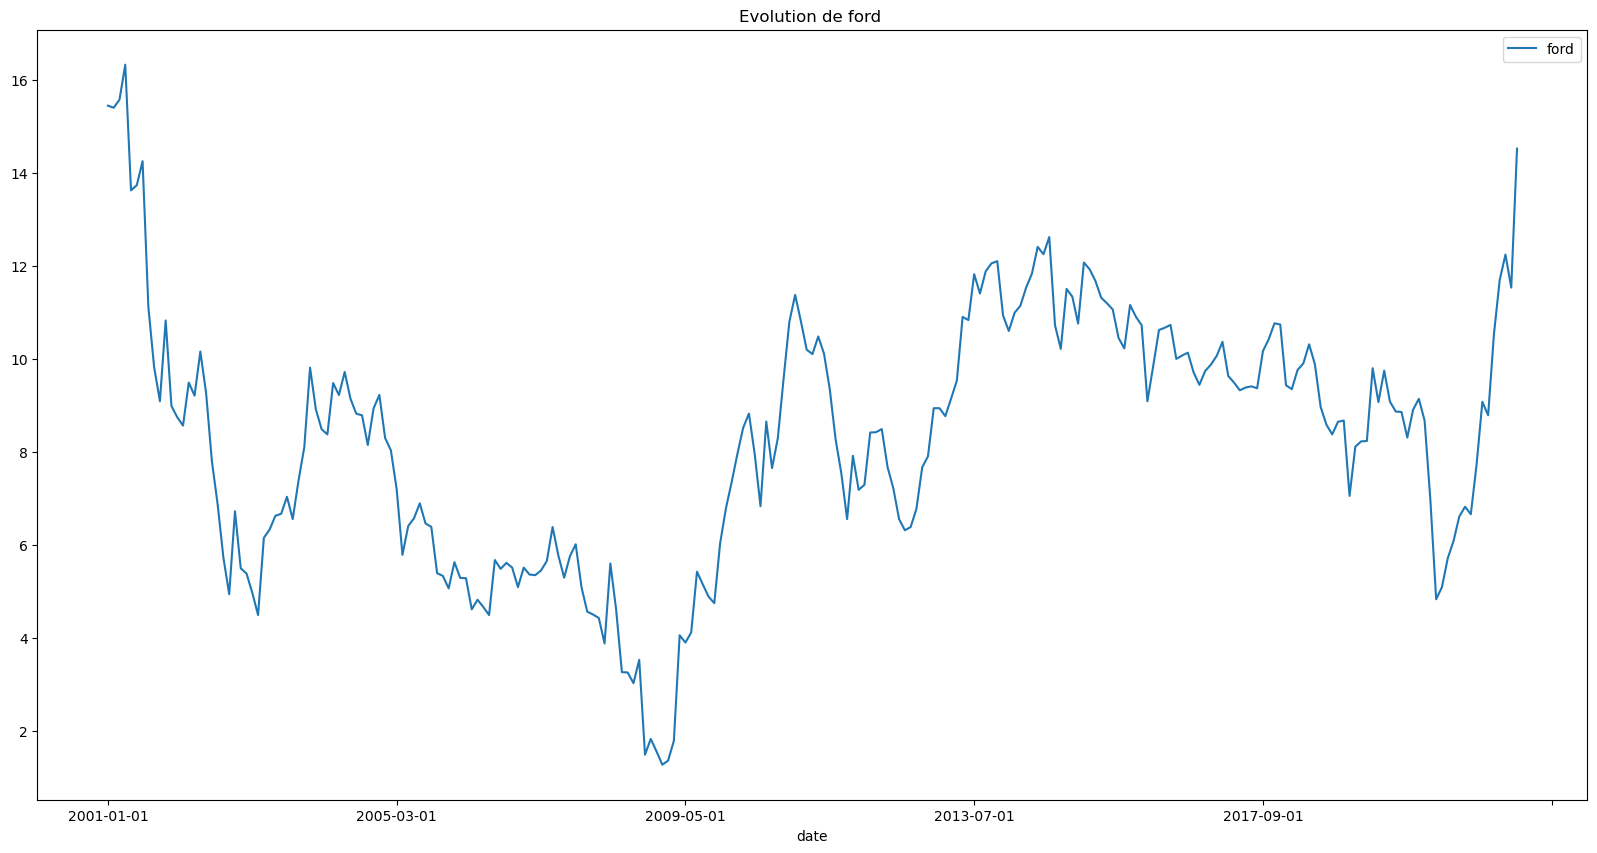

In [8]:
# graphique 1
plt.rcParams['figure.figsize'] = (20,10)

df.plot(x = "date", y="ford", title="Evolution de ford ")
plt.show()

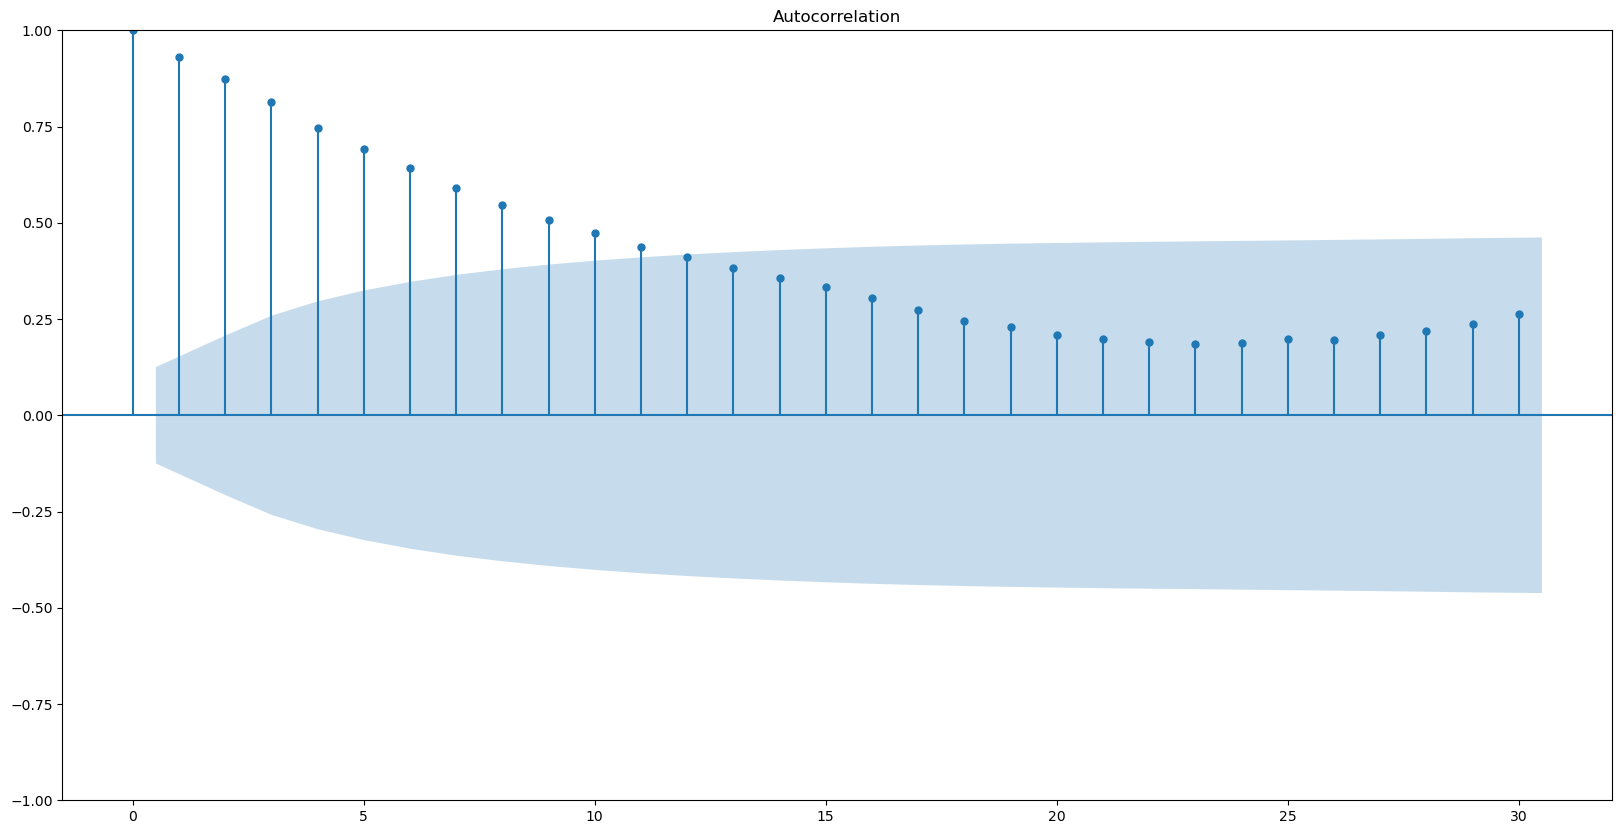

In [9]:
# graphique 2
plt.rcParams['figure.figsize'] = (20,10)

plot_acf(df["ford"], lags=30)
plt.show()

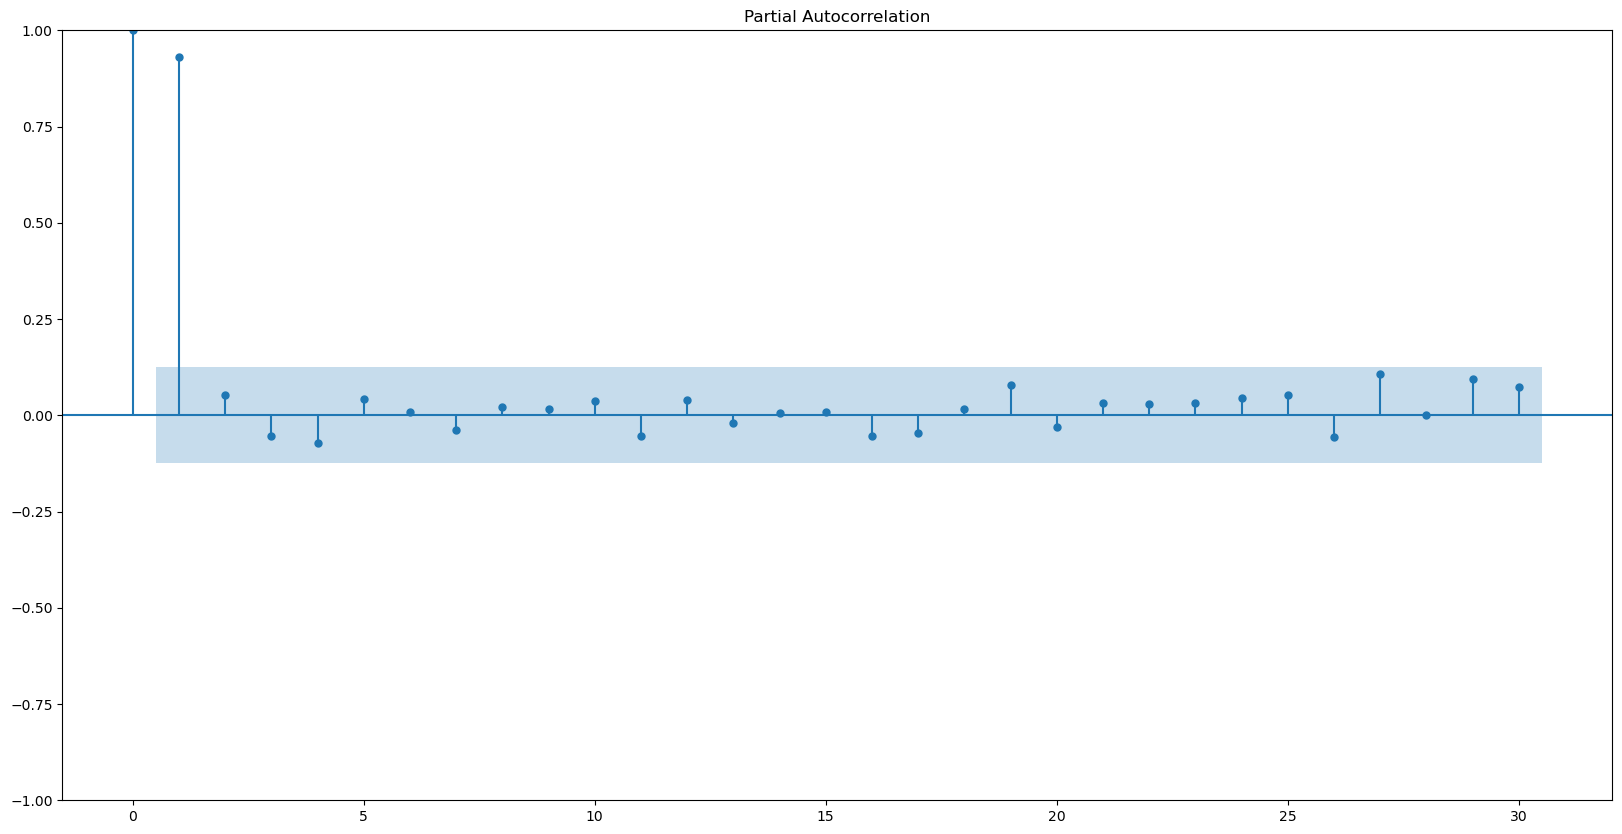

In [10]:
# graphique 3
plt.rcParams['figure.figsize'] = (20,10)

plot_pacf(df["ford"], lags=30)
plt.show()

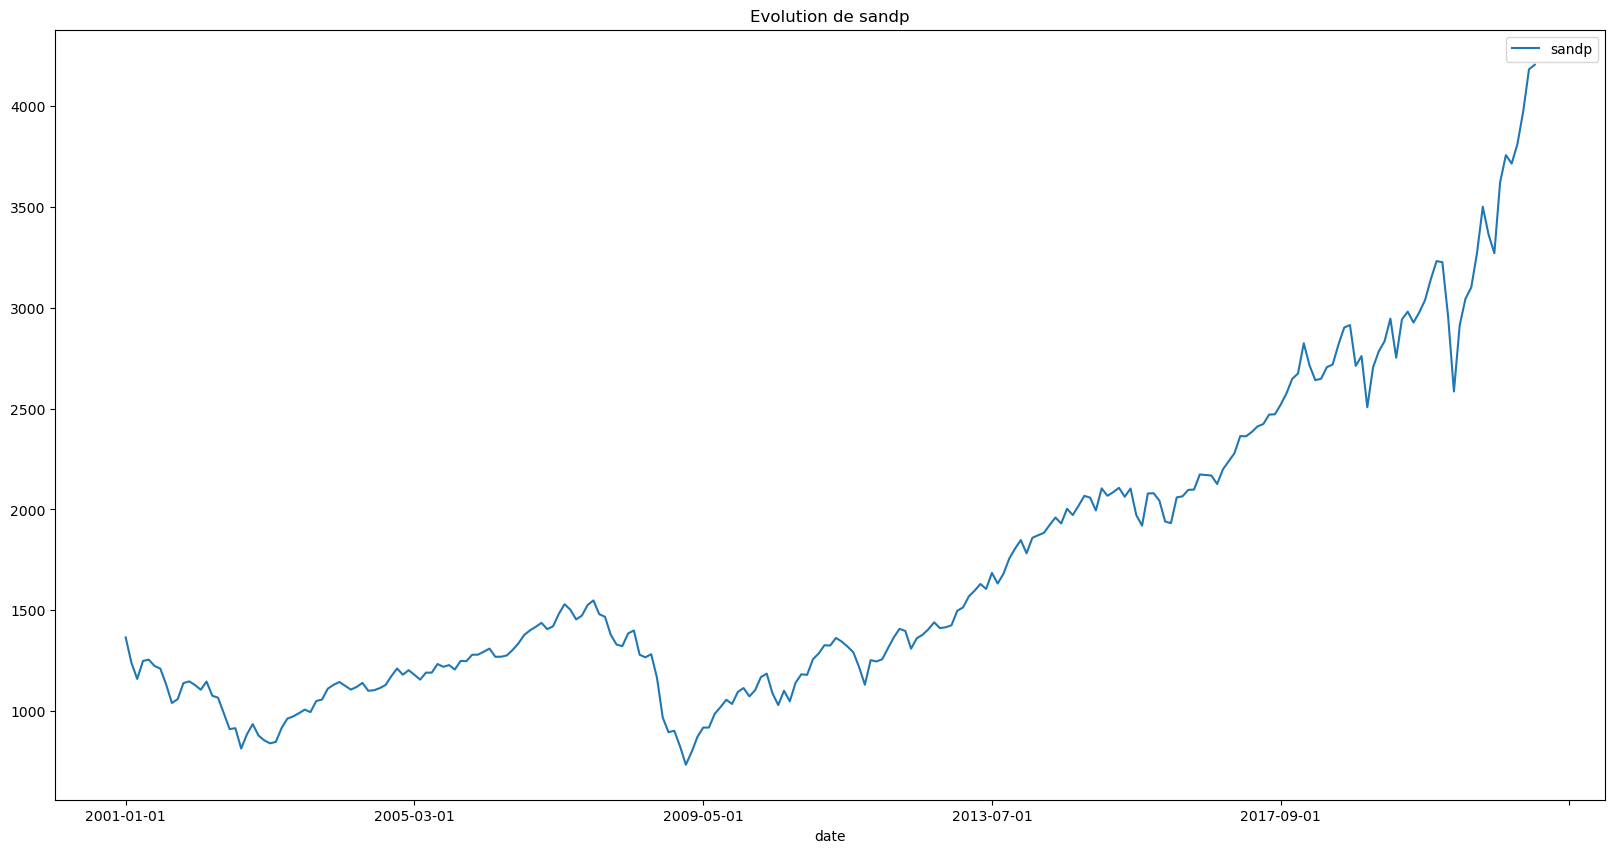

In [11]:
# graphique 4
plt.rcParams['figure.figsize'] = (20,10)

df.plot(x = "date", y="sandp", title="Evolution de sandp")
plt.show()

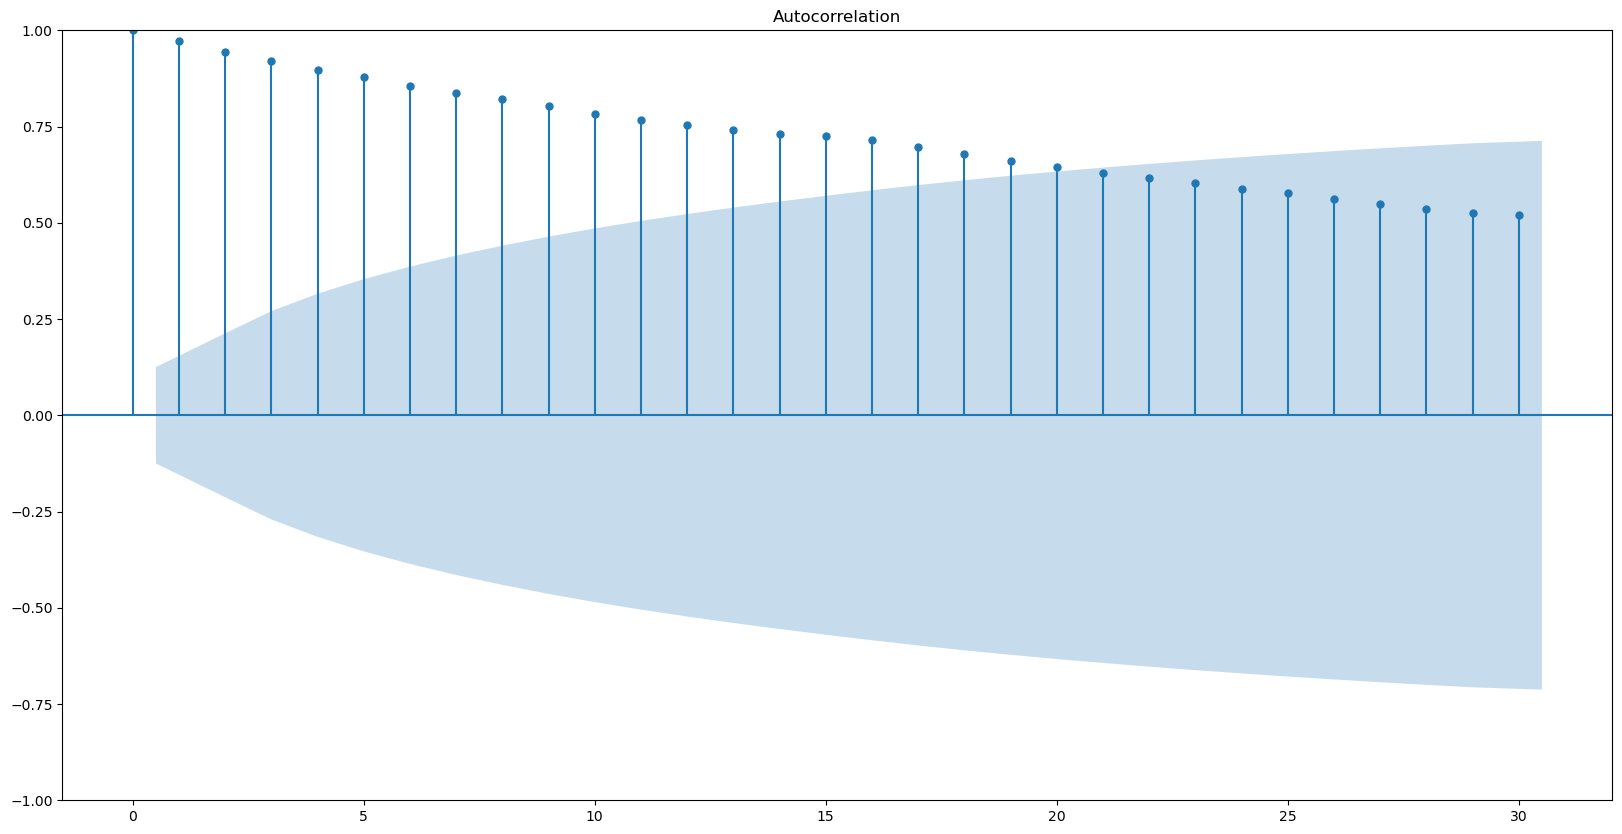

In [12]:
# graphique 5
plt.rcParams['figure.figsize'] = (20,10)

plot_acf(df["sandp"], lags=30)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: .5px solid black;">

- Ces graphiques sont :
    - graphiques lignes pour voir l'allure des séries et, éventuellement en déduire de l'information sur la stationnarité des séries
    - autocorrélogramme : permet de voir la structure autorégressive (de long terme) des séries
    - autocorrélations partielles : permet de voir l'autocorrélation entre deux périodes après avoir purgé l'effet des autres périodes
    
<br>
    
- Ils servent à analyser la stationnarité
    
    
<br>
    
- graphique 1 : grpahique d'évolution du NIVEAU de prix de l'actif ford. On constate que la série ne semble pas stationnaire : plusieurs tendances locales, une structure visibelement autocorrélée (type marche aléatoire ?)
- graphique 2 : autocorrélogramme. Montre que la série est fortement autocorrélée : une variation en $t$ a un effet 10 périodes plus tard (voir le dernier coefficient d'autocorrélation significativement différent de $0$, ie en dehors de l'intervalle de confiance)
- graphique 3 : autocorrélations partielles. Confirme l'idée de marche aléatoire puisque l'orsque l'on retire l'effet des autres périodes, la seule autocorrélation partielle significative est celle à l'ordre 1. 
    
<br>
    
- Meme analyse et mêmes commentaires pour les graphiques 4,5,6.
    
    
<br>
    
    
- Conclusion : les séries ne semblent pas stationnaires.
    
    
    


</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

    
    
    
<hr style=" border: .5px solid black;">

5. Menez les tests ADF sur les séries suivantes : 
    
- `ford`
- `sandp`

    
    
<br>
    
<b>Note</b> : 
- Le test est effectué pour `ford`, pour le modèle 1. Utilisez cette cellule de code pour mener les étapes suivantes.
- On redonne les tables des tests : pour le premier test, comparez les t-stats et la statistique de test ADF aux valeurs tabulées.
    
    
<br>
    
    
    


</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>



- Valeurs critiques de la constante et de la tendance dans le test de Dickey-Fuller

<table>
    <col width="50">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <tr>
        <td colspan="1" style="text-align: center;border-right: 2px solid black"></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black"><i>Modèle [2]</i></td>
        <td colspan="6" style="text-align: center;border-right: 2px solid black"><i>Modèle [1]</i></td>
    </tr>
    <tr>
        <td colspan="1" style="text-align: center;border-right: 2px solid black"></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Constante</td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Constante</td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Trend</td>
    </tr>
    <tr style="text-align: center;border-bottom: 2px solid black">
        <td style="text-align: center;border-right: 2px solid black">T</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">100</td>
        <td style="text-align: center;border-right: 2px dotted black">3.22</td>
        <td style="text-align: center;border-right: 2px dotted black">2.54</td>
        <td style="text-align: center;border-right: 2px solid black">2.17</td>
        <td style="text-align: center;border-right: 2px dotted black">3.78</td>
        <td style="text-align: center;border-right: 2px dotted black">3.11</td>
        <td style="text-align: center;border-right: 2px solid black">2.73</td>
        <td style="text-align: center;border-right: 2px dotted black">3.53</td>
        <td style="text-align: center;border-right: 2px dotted black">2.79</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">250</td>
        <td style="text-align: center;border-right: 2px dotted black">3.19</td>
        <td style="text-align: center;border-right: 2px dotted black">2.53</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.74</td>
        <td style="text-align: center;border-right: 2px dotted black">3.09</td>
        <td style="text-align: center;border-right: 2px solid black">2.73</td>
        <td style="text-align: center;border-right: 2px dotted black">3.49</td>
        <td style="text-align: center;border-right: 2px dotted black">2.79</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">500</td>
        <td style="text-align: center;border-right: 2px dotted black">3.18</td>
        <td style="text-align: center;border-right: 2px dotted black">2.52</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.08</td>
        <td style="text-align: center;border-right: 2px solid black">2.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.48</td>
        <td style="text-align: center;border-right: 2px dotted black">2.78</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">$\infty$</td>
        <td style="text-align: center;border-right: 2px dotted black">3.18</td>
        <td style="text-align: center;border-right: 2px dotted black">2.52</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.71</td>
        <td style="text-align: center;border-right: 2px dotted black">3.08</td>
        <td style="text-align: center;border-right: 2px solid black">2.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.46</td>
        <td style="text-align: center;border-right: 2px dotted black">2.78</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
</table>
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
    
- Valeurs critiques du test Dickey-Fuller $\rho = 1 \Leftrightarrow \phi = 0$

<table>
    <col width="50">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <tr>
        <td style="text-align: center;border-right: 2px solid black"></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black"><i>Modèle [1]</i></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black"><i>Modèle [2]</i></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black"><i>Modèle [3]</i></td>
    </tr>
    <tr style="text-align: center;border-bottom: 2px solid black">
        <td style="text-align: center;border-right: 2px solid black">T</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black"> 10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">100</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.60</td>
        <td style="text-align: center;border-right: 2px dotted black">-1.95</td>
        <td style="text-align: center;border-right: 2px solid black">-1.61</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.51</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.89</td>
        <td style="text-align: center;border-right: 2px solid black">-2.58</td>
        <td style="text-align: center;border-right: 2px dotted black">-4.04</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.45</td>
        <td style="text-align: center;border-right: 2px solid black">-3.15</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">250</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.58</td>
        <td style="text-align: center;border-right: 2px dotted black">-1.95</td>
        <td style="text-align: center;border-right: 2px solid black">-1.62</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.46</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.88</td>
        <td style="text-align: center;border-right: 2px solid black">-2.57</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.99</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.43</td>
        <td style="text-align: center;border-right: 2px solid black">-3.13</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">500</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.58</td>
        <td style="text-align: center;border-right: 2px dotted black">-1.95</td>
        <td style="text-align: center;border-right: 2px solid black">-1.62</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.44</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.87</td>
        <td style="text-align: center;border-right: 2px solid black">-2.57</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.98</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.42</td>
        <td style="text-align: center;border-right: 2px solid black">-3.13</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">$\infty$</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.58</td>
        <td style="text-align: center;border-right: 2px dotted black">-1.95</td>
        <td style="text-align: center;border-right: 2px solid black">-1.62</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.43</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.86</td>
        <td style="text-align: center;border-right: 2px solid black">-2.57</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.96</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.41</td>
        <td style="text-align: center;border-right: 2px solid black">-3.12</td>
    </tr>
</table>    
    
    
    
    
</span>

In [13]:
# importation de la 
from statsmodels.tsa.stattools import adfuller

In [14]:
# On commence par le modèle avec tendance et constante :
"""On stock les résultats du test dans une variable ici nommée adf1:
    - On appelle la fonction de test adf
    - On spécifie la variable pour laquelle on veut faire le test. Ici : ford
    - On donne en option le modèle. Ici on commence par constante et tendance, donc : "ct"
    - Le nombre de LAG est choisi via automatiquement sous le critère d'information AIC
    - On demande à stocker les résultats pour pouvoir regarder la significativité de la tendance
"""

adf1 = adfuller(df['ford'], regression='ct', autolag='AIC', regresults=True)

In [15]:
# Nous devons ensuite regarder si la tendance (dernière ligne) est significative, on affiche donc les résultats

adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     6.625
Date:                Wed, 27 Nov 2024   Prob (F-statistic):            0.00158
Time:                        15:13:18   Log-Likelihood:                -291.21
No. Observations:                 244   AIC:                             588.4
Df Residuals:                     241   BIC:                             598.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0609      0.019     -3.128      0.002      -0.099      -0.023
const          0.2629      0.173      1.523      0.129      -0.077       0.603
x2             0.0019      0.001      2.563      0.011       0.000       0.003
==============================================================================
Omnibus:                        7.419   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.024   Jarque-Bera (JB):               12.264
Skew:                           0.079   Prob(JB):                      0.00217
Kurtosis:                       4.087   Cond. No.                         477.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: .5px solid black;">

    
- La statistique de test associée à la tendance (X2) est de $2.563$. Contrairement aux tests de significativité classique. Cette statistique est à comparée aux valeurs tabulées par DF : à $5\%$ nous avons $2.79$ (avec 244 observations). 
- Ainsi, à $5\%$, la tendance n'est pas significative puisque notre t-stat est inférieure à la valeur tabulée.
- Nous rejetons le modèle 3 avec tendance et constante et nous passons donc au modèle sans tendance avec constante.
- On remarque aussi que le test, en se basant sur le critère d'information `AIC` a sélectionné un nombre de retard égal à $1$.
    


</span> 

In [16]:
# attention ici à bien changer l'option "regression" et mettre "c" au lieu de "ct"
adf1 = adfuller(df['ford'], regression='c', autolag='AIC', regresults=True)

In [17]:
adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.532
Date:                Wed, 27 Nov 2024   Prob (F-statistic):             0.0112
Time:                        15:13:18   Log-Likelihood:                -294.49
No. Observations:                 244   AIC:                             593.0
Df Residuals:                     242   BIC:                             600.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0489      0.019     -2.556      0.011      -0.087      -0.011
const          0.3994      0.166      2.405      0.017       0.072       0.727
==============================================================================
Omnibus:                        8.604   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               16.106
Skew:                           0.009   Prob(JB):                     0.000318
Kurtosis:                       4.259   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: .5px solid black;">

    
- Cette fois, on regarde la significativité de la constante : t-stat égale à $2.405$ contre $2.53$ la valeur tabulée.
- Une fois encore, nous acceptons l'hypothèse de non significativité de la constante dans le modèle 2.
    
- Nous passons donc au modèle 3 sans constante ni tendance.
- <b>NB</b> : pas besoin d'afficher les résultats ici, on iterprète directement la statitsitque de test.
    
    


</span> 

In [18]:
# attention ici à bien changer l'option "regression" et mettre "nc" au lieu de "c"
adf1 = adfuller(df['ford'], regression='n', autolag='AIC', regresults=True)

In [19]:
adf1

(-0.8609055822923205,
 0.3450536516312156,
 {'1%': -2.574964035877452,
  '5%': -1.9421551907566053,
  '10%': -1.6157753152576646},
 <statsmodels.stats.diagnostic.ResultsStore at 0x2208da130d0>)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: .5px solid black;">

    
- ADF : test unilatérale à gauche. La règle est donc inversée : 
     - $t_{\varphi} > t_{DF}$ on ne rejette pas $H_0$ : Racine unitaire
     - $t_{\varphi} < t_{DF}$ on rejette $H_0$ : Stationnaire
- Ici nous avons donc une statistique supérieure à la valeur tabulée (qui est rappelée par le logiciel)
- Nous ne rejettons pas l'hypothèse nulle, la série contient une racine unitaire.
- La série est non stationnaire de type stochastique (Difference Stationnary) : il faut la différencier (ou prendre le taux de croissance) pour la stationnariser. Nous devons, bien entendu vérifier que la variable ainsi transformée est elle-même stationnaire. 
    
<br>
    
- Ne pas hésiter ici à créer une cellule markdown pour mettre un titre en mettant "### Nom de la section", pour leur apprendre à structurer le notebook.
    
    
<br>
    
- Attention ici : enlever les valeur "NaN" : df = df.dropna()

</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    

### ADF - ford en taux de croissance
    
    
On teste la stationnariser du taux de croissance de ford (son rendement donc).
    
    


</span> 

In [20]:
df = df.dropna()
df

,date,ford,sandp,ustb3m,oil,rsandp,rford,roil,ersandp,erford
1,2001-02-01,15.411097,1239.939941,4.720,27.420000,-9.229074,-0.281915,-4.459934,-13.949074,-5.001915
2,2001-03-01,15.582887,1160.329956,4.180,26.400000,-6.420471,1.114716,-3.719912,-10.600471,-3.065284
3,2001-04-01,16.336536,1249.459961,3.830,26.400000,7.681436,4.836389,0.000000,3.851436,1.006389
4,2001-05-01,13.631827,1255.819946,3.540,28.370001,0.509019,-16.556196,7.462125,-3.030981,-20.096196
5,2001-06-01,13.743798,1224.380005,3.560,26.250000,-2.503539,0.821394,-7.472686,-6.063539,-2.738606
...,...,...,...,...,...,...,...,...,...,...
240,2021-01-01,10.530000,3714.239990,0.048,52.200001,-1.113666,19.795222,7.584503,-1.161666,19.747222
241,2021-02-01,11.700000,3811.149902,0.035,61.500000,2.609145,11.111111,17.816090,2.574145,11.076111
242,2021-03-01,12.250000,3972.889893,0.013,59.160000,4.243863,4.700855,-3.804878,4.230863,4.687855
243,2021-04-01,11.540000,4181.169922,0.003,63.580002,5.242532,-5.795918,7.471268,5.239532,-5.798918


In [21]:
# On commence par le modèle avec tendance et constante :


adf2 = adfuller(df['rford'], regression='ct', autolag='AIC', regresults=True)

In [29]:
adf2[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     33.89
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           6.92e-35
Time:                        19:17:06   Log-Likelihood:                -953.10
No. Observations:                 237   AIC:                             1924.
Df Residuals:                     228   BIC:                             1955.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.8630      0.168     -5.144      0.000      -1.194      -0.532
x2            -0.0802      0.152     -0.529      0.597      -0.379       0.218
x3            -0.0812      0.140     -0.579      0.563      -0.358       0.195
x4            -0.0405      0.126     -0.322      0.748      -0.288       0.207
x5            -0.0645      0.111     -0.583      0.560      -0.282       0.153
x6            -0.0029      0.091     -0.032      0.975      -0.181       0.176
x7            -0.2073      0.065     -3.171      0.002      -0.336      -0.078
const          0.1048      1.794      0.058      0.953      -3.430       3.639
x8             0.0067      0.013      0.513      0.609      -0.019       0.033
==============================================================================
Omnibus:                      165.846   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3287.522
Skew:                           2.397   Prob(JB):                         0.00
Kurtosis:                      20.605   Cond. No.                         275.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: .5px solid black;">

    
- La statistique de test associée à la tendance (X8) est de $0.513$ toujours comparée à $2.79$ (avec 244 observations). 
- Ainsi, à $5\%$, la tendance n'est pas significative puisque notre t-stat est inférieure à la valeur tabulée.
- Nous rejetons le modèle 3 avec tendance et constante et nous passons donc au modèle sans tendance avec constante.
- On remarque aussi que le test, en se basant sur le critère d'information `AIC` a sélectionné un nombre de retard égal à $7$.
    


</span> 

In [30]:
# On commence par le modèle avec tendance et constante :


adf2 = adfuller(df['rford'], regression='c', autolag='AIC', regresults=True)

adf2[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     38.82
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           1.21e-35
Time:                        19:17:48   Log-Likelihood:                -953.24
No. Observations:                 237   AIC:                             1922.
Df Residuals:                     229   BIC:                             1950.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.8563      0.167     -5.128      0.000      -1.185      -0.527
x2            -0.0858      0.151     -0.568      0.570      -0.383       0.212
x3            -0.0857      0.140     -0.613      0.540      -0.361       0.190
x4            -0.0440      0.125     -0.351      0.726      -0.291       0.203
x5            -0.0669      0.110     -0.606      0.545      -0.284       0.150
x6            -0.0044      0.090     -0.049      0.961      -0.183       0.174
x7            -0.2081      0.065     -3.188      0.002      -0.337      -0.079
const          0.8999      0.900      0.999      0.319      -0.874       2.674
==============================================================================
Omnibus:                      163.916   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3215.172
Skew:                           2.360   Prob(JB):                         0.00
Kurtosis:                      20.416   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: .5px solid black;">

    
- La statistique de test associée à la constante est de $0.999$ toujours comparée à $2.53$ (avec 244 observations). 
- Ainsi, à $5\%$, la constante n'est pas significative puisque notre t-stat est inférieure à la valeur tabulée.
- Nous rejetons le modèle 2 avec tendance et constante et nous passons donc au modèle sans tendance ni constante.
    
<br>
    
- Meme chose : on interpète idrectement la statistique de test ADF.
    
    
</span> 

In [32]:
# On commence par le modèle avec tendance et constante :


adf2 = adfuller(df['rford'], regression='n', autolag='AIC', regresults=True)

adf2

(-5.040185411074018,
 8.815893119249971e-07,
 {'1%': -2.57523832825936,
  '5%': -1.9421908963553556,
  '10%': -1.615745738021025},
 <statsmodels.stats.diagnostic.ResultsStore at 0x2118178ce90>)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: .5px solid black;">

    
- Cette fois (p-val ou statitique) : à $1\%$, le test rejette l'hypothèse nulle de présence d'une racine unitaire.
- La série `rford` est donc stationnaire et la série `ford` est dite <b>intégrée d'odre 1</b> puisqu'il a fallu la différencier une fois pour la stationnariser.
- D'où on travaillera sur la série de rendement.
    
<br>
    
- <b>Note</b> : on préfèrera le rendement à la différence première dans la mesure où il est plus simple d'interpréter un taux de croissance qu'une variation.
    
    
<br>
    
- Nouvelle cellule markdown pour passer au test de `sandp`
    
    
</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    

### ADF - sandp en niveau
    
    
On teste la série sandp.
    
    


</span> 

In [33]:
# On commence par le modèle avec tendance et constante :


adf3 = adfuller(df['sandp'], regression='ct', autolag='AIC', regresults=True)

adf3[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     2.770
Date:                Wed, 20 Nov 2024   Prob (F-statistic):            0.00429
Time:                        19:21:39   Log-Likelihood:                -1354.2
No. Observations:                 236   AIC:                             2728.
Df Residuals:                     226   BIC:                             2763.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0085      0.016      0.540      0.590      -0.023       0.040
x2             0.0140      0.068      0.208      0.836      -0.119       0.147
x3            -0.1658      0.068     -2.455      0.015      -0.299      -0.033
x4             0.0073      0.068      0.107      0.915      -0.128       0.142
x5            -0.0270      0.068     -0.396      0.692      -0.161       0.107
x6             0.0054      0.068      0.080      0.937      -0.129       0.140
x7            -0.0753      0.067     -1.123      0.263      -0.208       0.057
x8             0.2082      0.069      2.999      0.003       0.071       0.345
const        -15.2968     14.231     -1.075      0.284     -43.339      12.746
x9             0.1260      0.159      0.790      0.430      -0.188       0.440
==============================================================================
Omnibus:                       68.654   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              345.434
Skew:                          -1.040   Prob(JB):                     9.77e-76
Kurtosis:                       8.550   Cond. No.                     5.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: .5px solid black;">

    
- La statistique de test associée à la tendance (X8) est de $.790 $ toujours comparée à $2.79$ (avec 244 observations). 
- Ainsi, à $5\%$, la tendance n'est pas significative puisque notre t-stat est inférieure à la valeur tabulée.
- Nous rejetons le modèle 3 avec tendance et constante et nous passons donc au modèle sans tendance avec constante.
- On remarque aussi que le test, en se basant sur le critère d'information `AIC` a sélectionné un nombre de retard égal à $8$.
    


</span> 

In [34]:
# On commence par le modèle avec tendance et constante :


adf3 = adfuller(df['sandp'], regression='c', autolag='AIC', regresults=True)

adf3[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     3.043
Date:                Wed, 20 Nov 2024   Prob (F-statistic):            0.00286
Time:                        19:23:21   Log-Likelihood:                -1354.5
No. Observations:                 236   AIC:                             2727.
Df Residuals:                     227   BIC:                             2758.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0192      0.008      2.383      0.018       0.003       0.035
x2             0.0067      0.067      0.101      0.920      -0.125       0.139
x3            -0.1714      0.067     -2.555      0.011      -0.304      -0.039
x4             0.0031      0.068      0.046      0.964      -0.131       0.137
x5            -0.0303      0.068     -0.445      0.656      -0.164       0.104
x6             0.0022      0.068      0.033      0.974      -0.132       0.136
x7            -0.0783      0.067     -1.169      0.243      -0.210       0.054
x8             0.2082      0.069      3.002      0.003       0.072       0.345
const        -18.4981     13.631     -1.357      0.176     -45.357       8.361
==============================================================================
Omnibus:                       69.131   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.473
Skew:                          -1.049   Prob(JB):                     3.53e-76
Kurtosis:                       8.562   Cond. No.                     5.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: .5px solid black;">

    
- La statistique de test associée à la constante est de $-1.357$ toujours comparée à $2.53$ (avec 244 observations). 
- Ainsi, à $5\%$, la constante n'est pas significative puisque notre t-stat est inférieure (en valeur absolue) à la valeur tabulée.
- Nous rejetons le modèle 2 avec tendance et constante et nous passons donc au modèle sans tendance ni constante.
    
<br>
    
- Meme chose : on interpète idrectement la statistique de test ADF.
    
    
</span> 

In [35]:
# On commence par le modèle avec tendance et constante :


adf3 = adfuller(df['sandp'], regression='n', autolag='AIC', regresults=True)

adf3

(2.8750049612062956,
 0.9996332335111157,
 {'1%': -2.5752788501867276,
  '5%': -1.9421961774481569,
  '10%': -1.6157413754205638},
 <statsmodels.stats.diagnostic.ResultsStore at 0x2118a32c310>)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: .5px solid black;">

    
- Ici nous avons donc une statistique supérieure à la valeur tabulée 
- Nous ne rejettons pas l'hypothèse nulle, la série contient une racine unitaire à $5\%$ (même à 10).
- La série est non stationnaire de type stochastique (Difference Stationnary) : il faut la différencier (ou prendre le taux de croissance) pour la stationnariser. Nous devons, bien entendu vérifier que la variable ainsi transformée est elle-même stationnaire. 
    


</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    

### ADF - rsandp en niveau
    
    
On teste la série rsandp.
    
    


</span> 

In [36]:
# On commence par le modèle avec tendance et constante :


adf4 = adfuller(df['rsandp'], regression='ct', autolag='AIC', regresults=True)

adf4[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     104.3
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           2.52e-33
Time:                        19:26:00   Log-Likelihood:                -695.80
No. Observations:                 243   AIC:                             1398.
Df Residuals:                     240   BIC:                             1408.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9212      0.064    -14.441      0.000      -1.047      -0.796
const         -0.2884      0.550     -0.524      0.600      -1.372       0.795
x2             0.0069      0.004      1.751      0.081      -0.001       0.015
==============================================================================
Omnibus:                       16.097   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.746
Skew:                          -0.436   Prob(JB):                     6.98e-06
Kurtosis:                       4.259   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: .5px solid black;">

    
- La statistique de test associée à la tendance (X2) est de $1.751$ toujours comparée à $2.79$ (avec 244 observations). 
- Ainsi, à $5\%$, la tendance n'est pas significative puisque notre t-stat est inférieure à la valeur tabulée.
- Nous rejetons le modèle 3 avec tendance et constante et nous passons donc au modèle sans tendance avec constante.

    


</span> 

In [37]:
# On commence par le modèle avec tendance et constante :


adf4 = adfuller(df['rsandp'], regression='c', autolag='AIC', regresults=True)

adf4[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     203.8
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           6.42e-34
Time:                        19:26:25   Log-Likelihood:                -697.34
No. Observations:                 243   AIC:                             1399.
Df Residuals:                     241   BIC:                             1406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9057      0.063    -14.276      0.000      -1.031      -0.781
const          0.5444      0.277      1.965      0.051      -0.001       1.090
==============================================================================
Omnibus:                       14.844   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.176
Skew:                          -0.399   Prob(JB):                     1.53e-05
Kurtosis:                       4.247   Cond. No.                         4.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: .5px solid black;">

    
- La statistique de test associée à la constante est de $1.965$ toujours comparée à $2.53$ (avec 244 observations). 
- Ainsi, à $5\%$, la constante n'est pas significative puisque notre t-stat est inférieure (en valeur absolue) à la valeur tabulée.
- Nous rejetons le modèle 2 avec tendance et constante et nous passons donc au modèle sans tendance ni constante.
    
<br>
    
- Meme chose : on interpète idrectement la statistique de test ADF.
    
    
</span> 

In [38]:
# On commence par le modèle avec tendance et constante :


adf4 = adfuller(df['rsandp'], regression='n', autolag='AIC', regresults=True)

adf4

(-14.057706745562323,
 2.2184681097475407e-25,
 {'1%': -2.5750022466087485,
  '5%': -1.94216016038016,
  '10%': -1.6157711900523155},
 <statsmodels.stats.diagnostic.ResultsStore at 0x2118a2f6bd0>)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: .5px solid black;">

    
- Cette fois (p-val ou statitique) : à $1\%$, le test rejette l'hypothèse nulle de présence d'une racine unitaire.
- La série `rsandp` est donc stationnaire et la série `sandp` est dite <b>intégrée d'odre 1</b> puisqu'il a fallu la différencier une fois pour la stationnariser.
- D'où on travaillera sur la série de rendement.

    
    
</span> 